In [1]:
from datetime import datetime as dt
import unicodecsv

In [2]:
def read_csv(filename):
    """ Function to read a CSV file and return the list of records as JSON"""
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)


def parse_date(sdate):
    """Function converts string to date"""
    if sdate == '':
        return None
    else:
        return dt.strptime(sdate, '%Y-%m-%d')


def parse_int(sint):
    """Function to convert string to int"""
    if sint == '':
        return None
    else:
        return int(sint)


def parse_float_int(sfloat):
    """ Function to convert a float string to int """
    if sfloat == '':
        return None
    else:
        return int(float(sfloat))


def parse_float(sfloat):
    if sfloat == '':
        return None
    else:
        return float(sfloat)


In [3]:
print 'Parsing enrollments...'
enrollments = read_csv('enrollments.csv')
print 'Parsing engagements...'
daily_engagement = read_csv('daily_engagement.csv')
print 'Parsing submissions...'
project_submissions = read_csv('project_submissions.csv')
print 'Done.'

Parsing enrollments...
Parsing engagements...
Parsing submissions...
Done.


In [4]:
print 'Post processing enrollments...'
enrollment_students = set()
for enrolement in enrollments:
    enrolement['account_key'] = parse_int(enrolement['account_key'])
    enrolement['join_date'] = parse_date(enrolement['join_date'])
    enrolement['cancel_date'] = parse_date(enrolement['cancel_date'])
    enrolement['days_to_cancel'] = parse_int(enrolement['days_to_cancel'])
    enrolement['is_udacity'] = enrolement['is_udacity'] == 'True'
    enrolement['is_canceled'] = enrolement['is_canceled'] == 'True'
    enrollment_students.add(enrolement['account_key'])


print 'Post processing engagements...'
engagement_students = set()
for engagement in daily_engagement:
    # harmonise the account_key key variable
    engagement['account_key'] = parse_int(engagement['acct'])
    engagement['utc_date'] = parse_date(engagement['utc_date'])
    engagement['num_courses_visited'] = parse_float_int(
        engagement['num_courses_visited'])
    engagement['total_minutes_visited'] = parse_float(
        engagement['total_minutes_visited'])
    engagement['lessons_completed'] = parse_float_int(
        engagement['lessons_completed'])
    engagement['projects_completed'] = parse_float_int(
        engagement['projects_completed'])
    engagement_students.add(engagement['account_key'])

print 'Post processing submissions...'
submission_students = set()
for submission in project_submissions:
    submission['creation_date'] = parse_date(submission['creation_date'])
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['account_key'] = parse_int(submission['account_key'])
    submission['lesson_key'] = parse_int(submission['lesson_key'])
    submission_students.add(submission['account_key'])

print 'Done.'

Post processing enrollments...
Post processing engagements...
Post processing submissions...
Done.


In [5]:
print 'Enrolement - 1:'
print enrollments[0]
print 'Engagement - 1:'
print daily_engagement[0]
print 'Submission - 1:'
print project_submissions[0]

Enrolement - 1:
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': 448, u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}
Engagement - 1:
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': 0, u'acct': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
Submission - 1:
{u'lesson_key': 3176718735, u'processing_state': u'EVALUATED', u'account_key': 256, u'assigned_rating': u'UNGRADED', u'completion_date': datetime.datetime(2015, 1, 16, 0, 0), u'creation_date': datetime.datetime(2015, 1, 14, 0, 0)}


In [6]:
# Replace this with your code
enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = len(
    enrollment_students)  # Replace this with your code

# Replace this with your code
engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = len(
    engagement_students)  # Replace this with your code

# Replace this with your code
submission_num_rows = len(project_submissions)
submission_num_unique_students = len(
    submission_students)  # Replace this with your code

print 'No of enrollments:{0}'.format(enrollment_num_rows)
print 'No of engagements:{0}'.format(engagement_num_rows)
print 'No of submissions:{0}'.format(submission_num_rows)
print 'No of students enrolled: {0}'.format(enrollment_num_unique_students)
print 'No of students engaged: {0}'.format(engagement_num_unique_students)
print 'No of students submitted: {0}'.format(submission_num_unique_students)

No of enrollments:1640
No of engagements:136240
No of submissions:3642
No of students enrolled: 1302
No of students engaged: 1237
No of students submitted: 743


In [7]:
def getNonEngagements(enrollments, engagements):
    enrolled_ids=set(student['account_key'] for student in enrollments)
    engaged_ids=set(student['account_key'] for student in engagements)    
    non_engaged_ids = enrolled_ids - engaged_ids    
    return [student for student in enrollments if student['account_key'] in non_engaged_ids]
    
non_engagements = getNonEngagements(enrollments, daily_engagement)
print 'A non-engaging student : {0}'.format(non_engagements[0])
    

A non-engaging student : {u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': 1219, u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


In [8]:
print 'No of non-engagements: {0}'.format(len(non_engagements))

No of non-engagements: 71


In [9]:
print 'All Non Engaging students: '
#print non_engagements

All Non Engaging students: 


In [10]:
def haveAllNonEngagedStudentsCancelled(non_engaging_students_list):
    for student in non_engaging_students_list:    
        if not student['is_canceled']:
            return False
    return True

print 'Checking if all the non engaged student have cancelled...{0}'.format(haveAllNonEngagedStudentsCancelled(non_engagements))
    

Checking if all the non engaged student have cancelled...False


In [11]:
status_set = set(student['status'] for student in non_engagements)

print 'The unique values for status : {0}'.format(status_set)

The unique values for status : set([u'current', u'canceled'])


In [12]:
non_engaging_students = set(student['account_key'] for student in non_engagements)

print 'Non Engaging students: {0}'.format(non_engaging_students)

Non Engaging students: set([1025, 1155, 1284, 878, 902, 1291, 654, 664, 914, 1171, 1044, 789, 1304, 802, 926, 799, 1186, 803, 1190, 1191, 1069, 1101, 817, 819, 1145, 1079, 1063, 1213, 1086, 1218, 1219, 964, 1270, 1222, 711, 968, 841, 717, 889, 1237, 1238, 727, 728, 1241, 725, 733, 997, 1120, 737, 739, 996, 1125, 870, 871, 1129, 875, 749, 750, 1010, 884, 707, 1273, 1148, 766, 981])


In [13]:
print 'No of non-engaging students: {0}'.format(len(non_engaging_students))

No of non-engaging students: 65


In [14]:
students_cancelled_same_day = [student for student in non_engagements if student['days_to_cancel']==0]
unique_students_cancelled_same_day = set(student['account_key'] for student in students_cancelled_same_day)
print 'No of students who cancelled on the same day: {0}'.format(len(unique_students_cancelled_same_day))

No of students who cancelled on the same day: 63


In [15]:
students_cancelled_after_1day = [student for student in non_engagements if student['days_to_cancel']>0]
unique_students_cancelled_after_1day = set(student['account_key'] for student in students_cancelled_after_1day)
print 'No of students who took atleast 1 day to cancel: {0}'.format(len(unique_students_cancelled_after_1day))

No of students who took atleast 1 day to cancel: 1


In [16]:
print 'No of non engagements with at least 1 day before cancel: {0}'.format(len(students_cancelled_after_1day))

No of non engagements with at least 1 day before cancel: 2


In [17]:
print 'No of non_engagments with non-zero days to cancel or not cancelled yet: {0}'.format(len([student for student in non_engagements if (student['days_to_cancel']>0 or student['days_to_cancel'] == None)]))

No of non_engagments with non-zero days to cancel or not cancelled yet: 3


In [18]:
udacity_ids = set(student['account_key'] for student in enrollments if student['is_udacity'])
print 'No of udacity accounts: {0}'.format(len(udacity_ids))

def remove_udacity_ids(sourcelist):
    return [student for student in sourcelist if student['account_key'] not in udacity_ids]

non_udacity_enrollments = remove_udacity_ids(enrollments)
non_udacity_engagements=remove_udacity_ids(daily_engagement)
non_udacity_submissions=remove_udacity_ids(project_submissions)

print 'No of paid enrollments: {0}'.format(len(non_udacity_enrollments))
print 'No of paid engagments: {0}'.format(len(non_udacity_engagements))
print 'No of paid submissions: {0}'.format(len(non_udacity_submissions))
    

No of udacity accounts: 6
No of paid enrollments: 1622
No of paid engagments: 135656
No of paid submissions: 3634


In [19]:
# Students who have not cancelled yet or stayed for more than 7 days
'''
super_engaged_students_ids = set(student['account_key'] for student in non_udacity_enrollments if student['days_to_cancel'] >7 or student['days_to_cancel'] is None)
paid_students = {}
super_engaged_students = [student for student in non_udacity_enrollments if student['account_key'] in super_engaged_students_ids]
for student in non_udacity_enrollments:
    thiskey = student['account_key']
    if thiskey in super_engaged_students_ids:
        thisJoindate = student['join_date']
        if thiskey in paid_students.keys():                
            if thisJoindate > paid_students[thiskey]:
                paid_students[thiskey] = thisJoindate
        else:
            paid_students[thiskey] = thisJoindate
'''        

# The above code does not consider the case where a student has enrolled for a month and later re-joins a course and cancels 
# it yet again within a week. His engagement case to consider is the month long engagement, not just the latest engagement.
# The condition on the days to cancel and latest valid join date should be considered simultanously. 
# Thanks to Caroline, instructor for explaining the issue.
# Ref: https://discussions.udacity.com/t/getting-data-from-first-week-wrong-number-of-students/38153/6

paid_students={}
for enrollement in non_udacity_enrollments:
    thiskey = enrollement['account_key']
    if enrollement['days_to_cancel'] > 7 or enrollement['days_to_cancel'] is None:
        thisJoindate = enrollement['join_date']
        if thiskey not in paid_students or thisJoindate > paid_students[thiskey]:
            paid_students[thiskey] = thisJoindate

print 'No of students who have not cancelled yet or stayed for more than 7 days: {0}'.format(len(paid_students))


No of students who have not cancelled yet or stayed for more than 7 days: 995


In [20]:
# Find the no of engagement of the above selected students

def getPaidDataOnly(sourcelist):
    return [student for student in sourcelist if student['account_key'] in paid_students]

paid_enrollements = getPaidDataOnly(non_udacity_enrollments)
paid_engagements = getPaidDataOnly(non_udacity_engagements)
paid_submissions = getPaidDataOnly(non_udacity_submissions)

print 'No of paid enrollments: {0}'.format(len(paid_enrollements))
print 'No of paid engagements: {0}'.format(len(paid_engagements))
print 'No of paid submissions: {0}'.format(len(paid_submissions))




No of paid enrollments: 1293
No of paid engagements: 134549
No of paid submissions: 3618


In [21]:
def isEngagementWithOneWeek(joindate, engagementdate):
    delta = engagementdate - joindate
    # Update check if the no of days is greater than zero to eliminate engagements before this joining date
    return delta.days < 7 and delta.days >= 0

engagement_within_one_week = []
for engagement in paid_engagements:
    thiskey = engagement['account_key']    
    thisJoindate = paid_students[thiskey]
    thisEngagementdate = engagement['utc_date']
    if isEngagementWithOneWeek(thisJoindate, thisEngagementdate):
        engagement_within_one_week.append(engagement)

#engagement_of_super_engaged = [engagement for engagement in non_udacity_engagements if engagement['account_key'] in paid_students.keys() and isEngagementWithOneWeek(paid_students[engagement['account_key']],engagement['utc_date'])]
print 'No of engagements within first week: {0}'.format(len(engagement_within_one_week))

No of engagements within first week: 6919


In [22]:
print 'Just checking if the data is okay...'
list_of_accounts = [348, 590, 1124, 1139, 106]
for account_key in list_of_accounts:
    join_date = paid_students[account_key]
    print join_date
print 'OK.'

Just checking if the data is okay...
2015-03-05 00:00:00
2015-05-11 00:00:00
2015-04-08 00:00:00
2015-01-16 00:00:00
2015-03-10 00:00:00
OK.


In [23]:
from collections import defaultdict
import numpy as np

'''Function to group a list based on a field'''
def group_by_field(sourceList, fieldname):
    groupedDict = defaultdict(list)
    for data in sourceList:
        key = data[fieldname]
        groupedDict[key].append(data)
    return groupedDict

'''Function to get a list of values from the grouped data'''
def get_totaled_data_by_field(groupedDict,field_to_analyse):
    total_by_field = {}
    for key, listEngagements in groupedDict.items():
        total_by_field[key] = np.sum([engagement[field_to_analyse] for engagement in listEngagements])    
    return total_by_field

'''Function to print the statistics of grouped & totalled data'''
def get_Stats(totalled_data_by_field, field_to_analyse):
    totalValues = totalled_data_by_field.values();
    print "\n"
    print "-"*40
    print "Total ", field_to_analyse," by all students: {0}".format(np.sum(totalValues))
    print "No of students: ", len(totalValues)
    print "Mean : ", np.mean(totalValues)
    print "Std Deviation : ", np.std(totalValues)
    print "Min : ", np.min(totalValues)
    print "Max : ", np.max(totalValues)
    print "-"*40    
    
#print "FYI, the total no of minutes in a week: ", 7*24*60

In [24]:
engagements_by_account = group_by_field(engagement_within_one_week, 'account_key')

In [25]:
total_minutes_by_account = get_totaled_data_by_field(engagements_by_account, 'total_minutes_visited')
get_Stats(total_minutes_by_account, 'total minutes visited')



----------------------------------------
Total  total minutes visited  by all students: 305174.78512
No of students:  995
Mean :  306.708326753
Std Deviation :  412.996933409
Min :  0.0
Max :  3564.7332645
----------------------------------------


In [26]:
total_lessons_by_account=get_totaled_data_by_field(engagements_by_account, 'lessons_completed')
get_Stats(total_lessons_by_account, 'lessons completed')



----------------------------------------
Total  lessons completed  by all students: 1628
No of students:  995
Mean :  1.63618090452
Std Deviation :  3.00256129983
Min :  0
Max :  36
----------------------------------------


In [27]:
# Find all students where the total minutes engagement in a week is greater than 10080 (total minutes in a week)
surprising_engagement_students = set(key  for key,value in total_minutes_by_account.items() if value > 10080)
for key in surprising_engagement_students:    
    surp_student_engagement = engagements_by_account[key]
    print "Account: {k}, Join date={d}".format(k=key, d=paid_students[key])
    for engagement  in surp_student_engagement:
        print engagement['utc_date'], engagement['total_minutes_visited'], engagement['num_courses_visited']

# Even if the student has taken more than one course, his total engagement cannot be still greater than 10080. 
# The problem is that the function within one week, just checks if the engagement date is atmost 7 days after join date, 
# it does check if the engagement date is after the join date. This is the case when a student joins and cancels after 7 days 
# (so that this join date becomes the reference join date for the student) and joins again and cancells within a week. 
# All the engagements before the join date is also considered in that case as the delta.days is negative. 
# So to consider only the engagements within one week after joining, we have to add one more condition that delta.days > 0

In [28]:
# Find the statistics for the number of days the student was engaged in a week.
# Any engagement with at least one num_courses_visited is the desired engagement
for key, engagement_list in engagements_by_account.items():
    for engagement in engagement_list:
        engagement['has_visited'] = int(engagement['num_courses_visited'] > 0)

total_no_of_days_by_account = get_totaled_data_by_field(engagements_by_account, 'has_visited')
get_Stats(total_no_of_days_by_account, 'No of days')



----------------------------------------
Total  No of days  by all students: 2853
No of students:  995
Mean :  2.86733668342
Std Deviation :  2.25519800292
Min :  0
Max :  7
----------------------------------------


In [29]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
subway_project_lesson_keys = [746169184,3176718735]

print set(submission['assigned_rating'] for submission in paid_submissions)

def get_students_by_submission_status(statuslist):
    return set(submission['account_key'] for submission in paid_submissions \
            if submission['lesson_key'] in subway_project_lesson_keys and \
               submission['assigned_rating'] in statuslist)

passing_students = get_students_by_submission_status(['DISTINCTION','PASSED'])
print 'No of passing students: ', len(passing_students)

passing_engagement = []
non_passing_engagement= []
for engagement in engagement_within_one_week:
    if engagement['account_key'] in passing_students:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)                     

print 'No of passing engagements: ', len(passing_engagement)
print 'No of non-passing engagements: ', len(non_passing_engagement)


set([u'', u'DISTINCTION', u'UNGRADED', u'PASSED', u'INCOMPLETE'])
No of passing students:  647
No of passing engagements:  4527
No of non-passing engagements:  2392


In [40]:
passing_engagements_grouped = group_by_field(passing_engagement, 'account_key')
minutes_in_passing_engagements = get_totaled_data_by_field(passing_engagements_grouped, 'total_minutes_visited')
lessons_completed_in_passing_engagements = get_totaled_data_by_field(passing_engagements_grouped, 'lessons_completed')
days_spent_in_passing_engagements = get_totaled_data_by_field(passing_engagements_grouped, 'has_visited')
get_Stats(minutes_in_passing_engagements, 'Minutes spent by passing students engagements')
get_Stats(lessons_completed_in_passing_engagements, 'Lessons completed by passing students engagements')
get_Stats(days_spent_in_passing_engagements,'Days spent by passing students engagements')



----------------------------------------
Total  Minutes spent by passing students engagements  by all students: 255297.172075
No of students:  647
Mean :  394.586046484
Std Deviation :  448.499519327
Min :  0.0
Max :  3564.7332645
----------------------------------------


----------------------------------------
Total  Lessons completed by passing students engagements  by all students: 1328
No of students:  647
Mean :  2.05255023184
Std Deviation :  3.14222705558
Min :  0
Max :  36
----------------------------------------


----------------------------------------
Total  Days spent by passing students engagements  by all students: 2190
No of students:  647
Mean :  3.38485316847
Std Deviation :  2.25882147092
Min :  0
Max :  7
----------------------------------------


In [41]:
non_passing_engagements_grouped = group_by_field(non_passing_engagement, 'account_key')
minutes_in_non_passing_engagements = get_totaled_data_by_field(non_passing_engagements_grouped, 'total_minutes_visited')
lessons_completed_in_non_passing_engagements = get_totaled_data_by_field(non_passing_engagements_grouped, 'lessons_completed')
days_spent_in_non_passing_engagements = get_totaled_data_by_field(non_passing_engagements_grouped, 'has_visited')
get_Stats(minutes_in_non_passing_engagements, 'Minutes spent by non-passing students engagements')
get_Stats(lessons_completed_in_non_passing_engagements, 'Lessons completed by non-passing students engagements')
get_Stats(days_spent_in_non_passing_engagements, 'Days spent by non-passing students engagements')



----------------------------------------
Total  Minutes spent by non-passing students engagements  by all students: 49877.6130448
No of students:  348
Mean :  143.326474267
Std Deviation :  269.538619011
Min :  0.0
Max :  1768.52274933
----------------------------------------


----------------------------------------
Total  Lessons completed by non-passing students engagements  by all students: 300
No of students:  348
Mean :  0.862068965517
Std Deviation :  2.54915994183
Min :  0
Max :  27
----------------------------------------


----------------------------------------
Total  Days spent by non-passing students engagements  by all students: 663
No of students:  348
Mean :  1.90517241379
Std Deviation :  1.90573144136
Min :  0
Max :  7
----------------------------------------


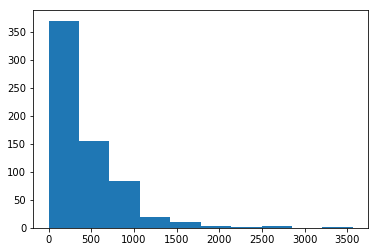

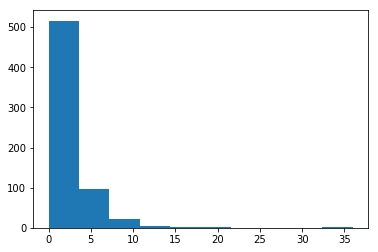

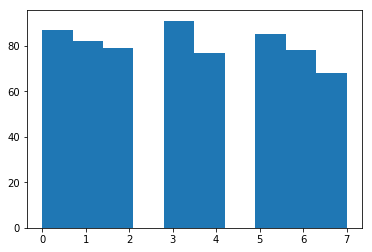

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(minutes_in_passing_engagements.values())
plt.show()
plt.hist(lessons_completed_in_passing_engagements.values())
plt.show()
plt.hist(days_spent_in_passing_engagements.values())
plt.show()

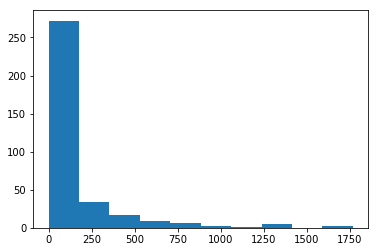

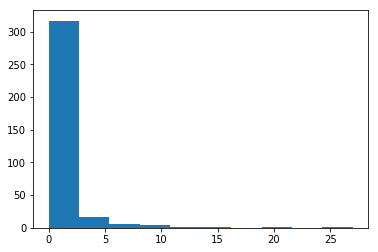

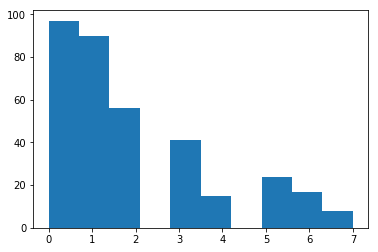

In [54]:
plt.hist(minutes_in_non_passing_engagements.values())
plt.show()
plt.hist(lessons_completed_in_non_passing_engagements.values())
plt.show()
plt.hist(days_spent_in_non_passing_engagements.values())
plt.show()